<a href="https://colab.research.google.com/github/benamaranermine/predict-live-birth-occurrence-before-in-vitro-fertilization-treatment/blob/main/test_pretrainedmodels(hfea_nanfilled_onlyfiv_reduced).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # filter the warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

import pandas as pd
import numpy as np
from numpy import genfromtxt
import csv
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.feature_selection import RFECV,SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR, SVC, LinearSVC
from google.colab import drive



In [2]:
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:

file_path = '/content/drive/MyDrive/hfea_nanfilled_onlyfiv_reduced.xlsx'
data = pd.read_excel(file_path)


In [ ]:
data

,Live birth occurrence,Egg source,Patient age at treatment,Causes of infertility - tubal disease,Total number of previous live births - IVF or DI,Total number of previous pregnancies - IVF and DI,Causes of infertility - endometriosis,Causes of infertility - ovulatory disorder,Total number of previous IVF cycles,Total number of previous DI cycles,Sperm source,Partner age
0,0,1,47.5,0,0,0,0,0,3,0,0,36.323179
1,0,1,26.0,0,0,0,0,0,0,0,1,36.323179
2,0,1,26.0,0,1,1,0,0,0,0,1,26.000000
3,0,1,26.0,0,0,0,0,0,1,0,1,26.000000
4,0,1,41.0,0,0,3,0,0,0,0,1,41.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
155656,0,1,26.0,1,0,1,0,0,0,0,1,26.000000
155657,0,1,26.0,1,0,0,0,0,1,0,1,26.000000
155658,1,1,26.0,1,0,1,0,0,2,0,1,26.000000
155659,1,1,36.0,0,1,1,0,0,0,0,1,36.000000


Exploratory Data Analysis


As data scientists, we usually use the words EDA and Data Visualization interchangeably. However, EDA is an approach to data analysis that uses a variety of techniques, and one of them is Data Visualization (also called Graphical EDA).

Before Visualizing (Non-Graphical EDA)

In [ ]:
data.shape

(155661, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155661 entries, 0 to 155660
Data columns (total 12 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Live birth occurrence                              155661 non-null  int64  
 1   Egg source                                         155661 non-null  int64  
 2   Patient age at treatment                           155661 non-null  float64
 3   Causes of infertility - tubal disease              155661 non-null  int64  
 4   Total number of previous live births - IVF or DI   155661 non-null  int64  
 5   Total number of previous pregnancies - IVF and DI  155661 non-null  int64  
 6   Causes of infertility - endometriosis              155661 non-null  int64  
 7   Causes of infertility - ovulatory disorder         155661 non-null  int64  
 8   Total number of previous IVF cycles                155661 non-null  int64 

In [ ]:
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Live birth occurrence,155661.0,0.253108,0.434794,0.0,0.0,0.000000,1.0,1.0
Egg source,155661.0,0.944270,0.229400,0.0,1.0,1.000000,1.0,1.0
Patient age at treatment,155661.0,33.717453,6.780928,26.0,26.0,36.000000,38.5,47.5
Causes of infertility - tubal disease,155661.0,0.095875,0.294421,0.0,0.0,0.000000,0.0,1.0
Total number of previous live births - IVF or DI,155661.0,0.234336,0.456294,0.0,0.0,0.000000,0.0,4.0
Total number of previous pregnancies - IVF and DI,155661.0,0.837692,0.617324,0.0,0.0,1.000000,1.0,5.0
Causes of infertility - endometriosis,155661.0,0.056578,0.231035,0.0,0.0,0.000000,0.0,1.0
Causes of infertility - ovulatory disorder,155661.0,0.114794,0.318775,0.0,0.0,0.000000,0.0,1.0
Total number of previous IVF cycles,155661.0,1.397910,1.624160,0.0,0.0,1.000000,2.0,6.0
Total number of previous DI cycles,155661.0,0.092207,0.597306,0.0,0.0,0.000000,0.0,6.0


In [ ]:
data.isnull().sum()


Live birth occurrence                                0
Egg source                                           0
Patient age at treatment                             0
Causes of infertility - tubal disease                0
Total number of previous live births - IVF or DI     0
Total number of previous pregnancies - IVF and DI    0
Causes of infertility - endometriosis                0
Causes of infertility - ovulatory disorder           0
Total number of previous IVF cycles                  0
Total number of previous DI cycles                   0
Sperm source                                         0
Partner age                                          0
dtype: int64

Graphical EDA

1-covert age ranges into categorical data


*  Patient age at treatment
*  Partner age



In [4]:


# Assuming you have already read the Excel file into a DataFrame called 'data'
# Replace 'data' with the actual variable name if different

# Custom function to map float values to categorical values based on age ranges
def map_age_range(age):
    if 18 <= age <= 34:
        return 0
    elif 35 <= age <= 37:
        return 1
    elif 38 <= age <= 39:
        return 2
    elif 40 <= age <= 42:
        return 3
    elif 43 <= age <= 44:
        return 4
    elif 45 <= age <= 50:
        return 5
    elif 50 <= age <= 65:
        return 6
    else:
        return None  # Handle any other cases as per your requirement

# Apply the custom mapping function to the 'Patient Age at Treatment' column
data['Patient age at treatment'] = data['Patient age at treatment'].map(map_age_range)

# Verify the changes
print(data['Patient age at treatment'])


0         5
1         0
2         0
3         0
4         3
         ..
155656    0
155657    0
155658    0
155659    1
155660    0
Name: Patient age at treatment, Length: 155661, dtype: int64


In [5]:
# Apply the custom mapping function to the 'Patient Age at Treatment' column
data['Partner age'] = data['Partner age'].map(map_age_range).astype('Int64')

# Verify the changes
print(data['Partner age'])


0         1
1         1
2         0
3         0
4         3
         ..
155656    0
155657    0
155658    0
155659    1
155660    1
Name: Partner age, Length: 155661, dtype: Int64


2- Graphical EDA
Univariate analysis is simply the analysis of one variable at a time.


*   For categorical features, we want to know the number of unique classes and how frequently they occur.

*   For numerical features, we want to know the range of values present and how often these values (or groups of values) occur.




In [ ]:
data.isnull().sum()


Live birth occurrence                                0
Egg source                                           0
Patient age at treatment                             0
Causes of infertility - tubal disease                0
Total number of previous live births - IVF or DI     0
Total number of previous pregnancies - IVF and DI    0
Causes of infertility - endometriosis                0
Causes of infertility - ovulatory disorder           0
Total number of previous IVF cycles                  0
Total number of previous DI cycles                   0
Sperm source                                         0
Partner age                                          0
dtype: int64

<Figure size 1000x800 with 0 Axes>

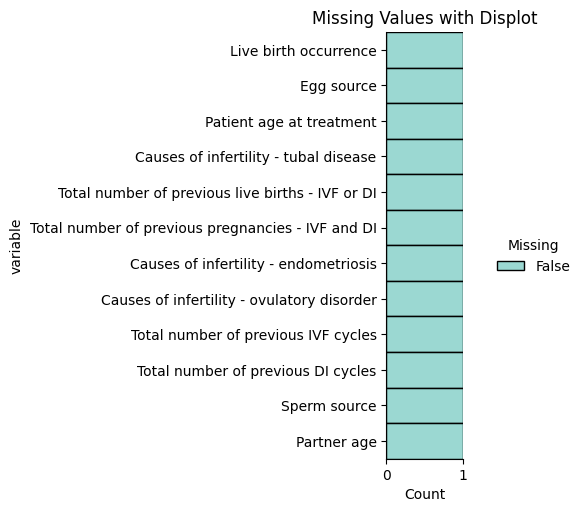

In [ ]:
plt.figure(figsize=(10,8))
sns.displot(
    data=data.isna().melt(value_name="Missing"),
    y="variable",
    hue="Missing",
    multiple="fill",
    palette = "GnBu"
)
plt.title('Missing Values with Displot')
plt.show()

Now let's look at unique values in data columns

In [ ]:
for col in data:
    print(f"{col} has : {data[col].unique()} unique values\n")

Live birth occurrence has : [0 1] unique values

Egg source has : [1 0] unique values

Patient age at treatment has : [5 0 3 2 1 4] unique values

Causes of infertility - tubal disease has : [0 1] unique values

Total number of previous live births - IVF or DI has : [0 1 2 3 4] unique values

Total number of previous pregnancies - IVF and DI has : [0 1 3 2 4 5] unique values

Causes of infertility - endometriosis has : [0 1] unique values

Causes of infertility - ovulatory disorder has : [0 1] unique values

Total number of previous IVF cycles has : [3 0 1 2 4 5 6] unique values

Total number of previous DI cycles has : [0 6 4 3 5 2 1] unique values

Sperm source has : [0 1] unique values

Partner age has : <IntegerArray>
[1, 0, 3, 2, 4, 5, 6]
Length: 7, dtype: Int64 unique values



# Count Plot

Target variable :Live birth occurrence

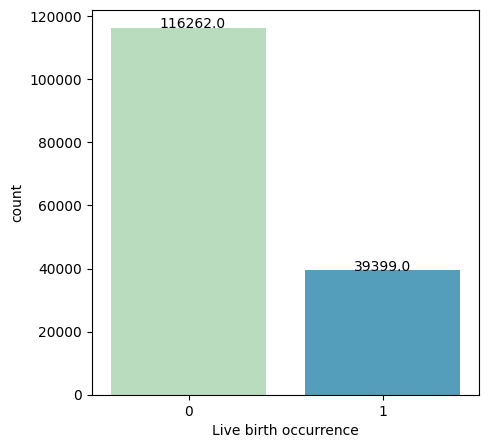

In [ ]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x = data['Live birth occurrence'], palette="GnBu")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

In [ ]:
# The classes are heavily skewed we need to solve this issue later.
print('No Live birth occurrence', round(data['Live birth occurrence'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Live birth occurrence', round(data['Live birth occurrence'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

No Live birth occurrence 74.69 % of the dataset
Live birth occurrence 25.31 % of the dataset


we can see that we have unbalanced data

# corrolation

<Axes: >

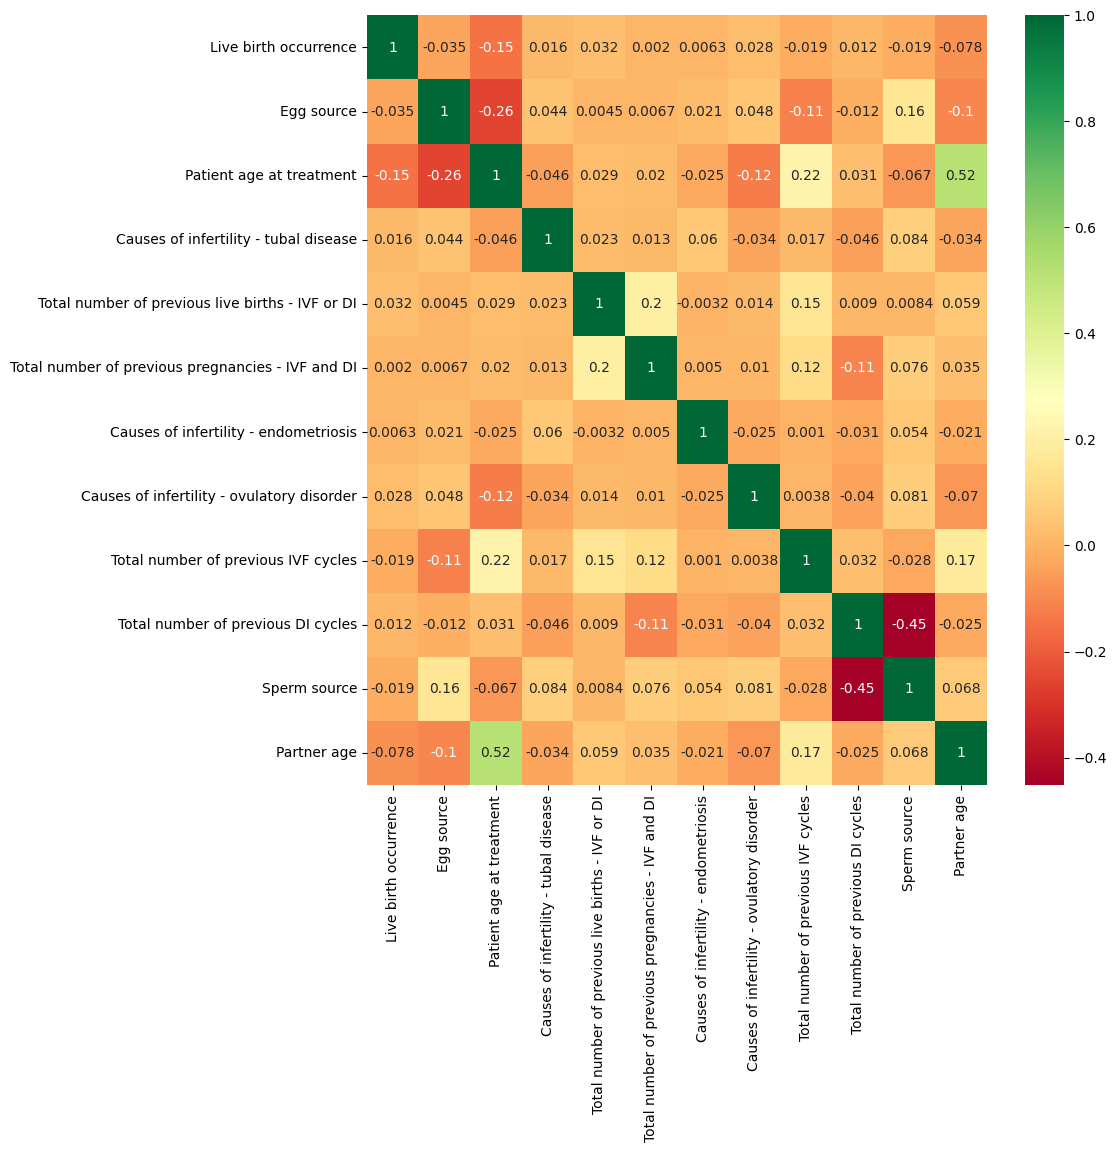

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(method='pearson'),cbar=True,cmap='RdYlGn',annot=True)

In [ ]:
# Most predominante variable
#Lets you know which variables have the most influence on Live birth occurrence
numeric_data = data.select_dtypes(exclude="object")
numeric_corr = numeric_data.corr()
Num_feature = numeric_corr["Live birth occurrence"].sort_values(ascending=False).head(22).to_frame()
z = Num_feature.drop(["Live birth occurrence"])
cm = sns.light_palette("#5F9EA0", as_cmap=True)
style = z.style.background_gradient(cmap=cm)
style

,Live birth occurrence
Total number of previous live births - IVF or DI,0.031811
Causes of infertility - ovulatory disorder,0.028191
Causes of infertility - tubal disease,0.015890
Total number of previous DI cycles,0.011803
Causes of infertility - endometriosis,0.006324
Total number of previous pregnancies - IVF and DI,0.002029
Total number of previous IVF cycles,-0.019316
Sperm source,-0.019446
Egg source,-0.035315
Partner age,-0.077951


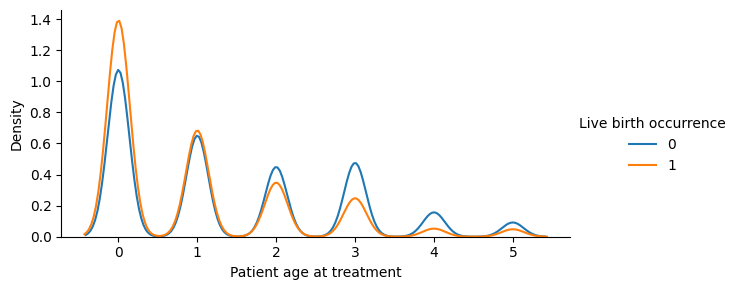

In [ ]:
grid=sns.FacetGrid(data,hue='Live birth occurrence',aspect=2)
grid.map(sns.kdeplot,'Patient age at treatment')
grid.add_legend()

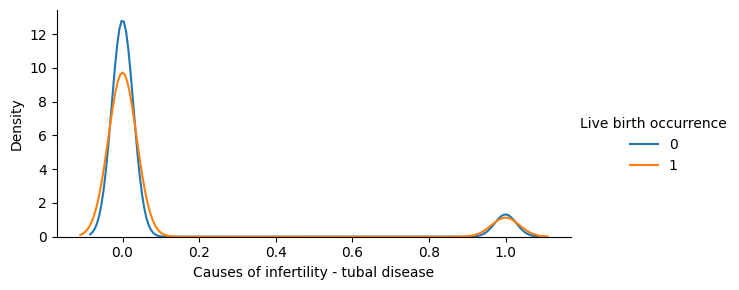

In [ ]:
grid=sns.FacetGrid(data,hue='Live birth occurrence',aspect=2)
grid.map(sns.kdeplot,'Causes of infertility - tubal disease')
grid.add_legend()

In [ ]:
data.drop_duplicates()


,Live birth occurrence,Egg source,Patient age at treatment,Causes of infertility - tubal disease,Total number of previous live births - IVF or DI,Total number of previous pregnancies - IVF and DI,Causes of infertility - endometriosis,Causes of infertility - ovulatory disorder,Total number of previous IVF cycles,Total number of previous DI cycles,Sperm source,Partner age
0,0,1,5,0,0,0,0,0,3,0,0,1
1,0,1,0,0,0,0,0,0,0,0,1,1
2,0,1,0,0,1,1,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,1,0,1,0
4,0,1,3,0,0,3,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
155541,0,1,1,0,0,2,0,0,4,0,0,2
155546,1,1,0,0,0,0,0,0,0,5,0,3
155551,0,0,0,0,0,0,0,0,0,0,1,2
155586,0,1,1,0,0,2,0,0,6,0,0,2


In [6]:
from sklearn.utils import resample

# Separate the majority and minority classes
df_majority = data[data['Live birth occurrence'] == 0]
df_minority = data[data['Live birth occurrence'] == 1]

# Downsample the majority class
df_majority_downsampled = resample(df_majority,
                                   replace=False,  # Set to False for undersampling
                                   n_samples=39399,  # Specify the desired number of samples
                                   random_state=42)  # Set a random state for reproducibility

# Combine the downsampled majority class with the minority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Shuffle the DataFrame if needed
df_downsampled = df_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)


#Data Balancing

In [7]:
X = df_downsampled.drop(['Live birth occurrence'], axis=1)


In [8]:
from sklearn.preprocessing import StandardScaler

# Select the columns from the DataFrame
cols = X.columns

# Initialize the scaler
scaler = StandardScaler()

# Scale the features
scaled_features = scaler.fit_transform(X)

# Create new DataFrames for scaled features
X = pd.DataFrame(scaled_features, columns=cols)


In [9]:
Y = df_downsampled['Live birth occurrence']

In [10]:
# split the dataset
SEED=23
X_new_train, X_new_test, y_new_train, Y_new_test = train_test_split(X, Y, test_size=0.2,shuffle=True, stratify=Y, random_state=SEED)
#With random_state=0 , we get the same train and test sets across different executions


In [11]:
from keras.models import load_model

# Load the saved model
pretrained_model = load_model('/content/drive/MyDrive/my_model3.h5')


In [12]:
from keras.models import Model
from keras.layers import Input, Dense
import tensorflow as tf


In [13]:
num_classes = 2


In [14]:
# You can reuse the pretrained model with different input shapes
new_input_shape = (11,)  # Change this to the desired input shape
new_input = Input(shape=new_input_shape)
new_layers = Dense(32, activation='relu', name='new_dense')(new_input)  # Change the number of units

# Connect the new input layer to a dense layer with the desired number of units
adapted_hidden_layer = Dense(64, activation='relu', name='adapted_dense')(new_layers)

# Connect the adapted hidden layer to the pretrained model's output layer
pretrained_output = pretrained_model.layers[-1](adapted_hidden_layer)

# Concatenate the pretrained output with the new layers
merged = tf.keras.layers.concatenate([pretrained_output, new_layers])

# Add a final prediction layer
output = Dense(num_classes, activation='softmax', name='final_output')(merged)

# Create the new model with the combined architecture
new_model = Model(inputs=[new_input], outputs=[output])


In [15]:
from keras.utils import to_categorical

# Assuming your original target data is y_new_train

num_classes = 2  # Number of classes in your classification problem
y_new_train_encoded = to_categorical(y_new_train, num_classes)
y_new_test_encoded = to_categorical(Y_new_test, num_classes)

new_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [16]:
new_model.fit(X_new_train, y_new_train_encoded, epochs=10, batch_size=32, validation_data=(X_new_test, y_new_test_encoded))


Epoch 1/10
1970/1970 [==============================] - 6s 2ms/step - loss: 0.6750 - accuracy: 0.5729 - val_loss: 0.6729 - val_accuracy: 0.5807
Epoch 2/10
1970/1970 [==============================] - 4s 2ms/step - loss: 0.6674 - accuracy: 0.5859 - val_loss: 0.6680 - val_accuracy: 0.5812
Epoch 3/10
1970/1970 [==============================] - 6s 3ms/step - loss: 0.6662 - accuracy: 0.5862 - val_loss: 0.6686 - val_accuracy: 0.5808
Epoch 4/10
1970/1970 [==============================] - 4s 2ms/step - loss: 0.6654 - accuracy: 0.5867 - val_loss: 0.6675 - val_accuracy: 0.5848
Epoch 5/10
1970/1970 [==============================] - 4s 2ms/step - loss: 0.6653 - accuracy: 0.5875 - val_loss: 0.6673 - val_accuracy: 0.5855
Epoch 6/10
1970/1970 [==============================] - 6s 3ms/step - loss: 0.6648 - accuracy: 0.5878 - val_loss: 0.6696 - val_accuracy: 0.5843
Epoch 7/10
1970/1970 [==============================] - 5s 3ms/step - loss: 0.6643 - accuracy: 0.5907 - val_loss: 0.6672 - val_accuracy:

In [17]:
# Step 6: Evaluate the model
loss, accuracy = new_model.evaluate(X_new_test, y_new_test_encoded)
print('Validation loss:', loss)
print('Validation accuracy:', accuracy)

493/493 [==============================] - 1s 1ms/step - loss: 0.6675 - accuracy: 0.5844
Validation loss: 0.6675113439559937
Validation accuracy: 0.5843908786773682


In [18]:
from sklearn.metrics import roc_auc_score

# Assuming you have predictions and true labels for the validation set
y_pred = new_model.predict(X_new_test)
auc = roc_auc_score(y_new_test_encoded, y_pred)

print("AUC:", auc)

493/493 [==============================] - 1s 1ms/step
AUC: 0.6120512799866011


In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_score

# Assuming you have predictions and true labels for the validation set
y_pred = new_model.predict(X_new_test)
y_pred_binary = np.round(y_pred).astype(int)  # Convert predicted probabilities to binary labels

precision = precision_score(y_new_test_encoded, y_pred_binary, average='micro')
print("Precision:", precision)


493/493 [==============================] - 1s 1ms/step
Precision: 0.5843908629441624
